# **Iris Flower Classification**

Iris flower classification is a classic machine learning problem in which the goal is to categorize *iris* flowers into one of three species based on certain features of the flower. The dataset commonly used for this task is the Iris dataset, which was introduced by British biologist and statistician Ronald A. Fisher in 1936. It has become a standard dataset in machine learning and is often used for practicing and teaching classification algorithms.

The Iris dataset consists of **150 samples** of iris flowers, with each sample belonging to one of three species:

1. **Iris Setosa**
2. **Iris Versicolor**
3. **Iris Virginica**

For each sample, the following four features are measured:

1. **Sepal length (in centimeters)**
2. **Sepal width (in centimeters)**
3. **Petal length (in centimeters)**
4. **Petal width (in centimeters)**

The dataset is divided into three classes, with 50 samples from each class. The goal is to build a machine learning model that can accurately classify new iris flowers into one of these three species based on the provided features.

![](iris_flowers.png)

## Import Libraries:

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import confusion_matrix

import tensorflow as tf

import warnings
warnings.filterwarnings('ignore')

## Data Collection & Data Preprocessing: 

In [3]:
#Load Data and review content
df=pd.read_csv('Iris.csv')
df.drop('Id',axis=1, inplace=True)
df_eda=df.copy()
df.head()

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   SepalLengthCm  150 non-null    float64
 1   SepalWidthCm   150 non-null    float64
 2   PetalLengthCm  150 non-null    float64
 3   PetalWidthCm   150 non-null    float64
 4   Species        150 non-null    object 
dtypes: float64(4), object(1)
memory usage: 6.0+ KB


In [5]:
#number of samples for each species
df["Species"].value_counts()

Species
Iris-setosa        50
Iris-versicolor    50
Iris-virginica     50
Name: count, dtype: int64

In [6]:
# to display stats about the data
df.describe()

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm
count,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.054000,3.758667,1.198667
std,0.828066,0.433594,1.764420,0.763161
min,4.300000,2.000000,1.000000,0.100000
25%,5.100000,2.800000,1.600000,0.300000
50%,5.800000,3.000000,4.350000,1.300000
75%,6.400000,3.300000,5.100000,1.800000
max,7.900000,4.400000,6.900000,2.500000


In [7]:
#Use a Label encoder to convert String to numeric values 
#for the target variable

label_encoder = LabelEncoder()
df['Species'] = label_encoder.fit_transform(df['Species'])
df.head()

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0


## **Exploratory Data Analysis**

## Correlation Matrix

A correlation matrix is a square matrix that summarizes the strength and direction of the linear relationships between pairs of variables:

1. **Measuring Relationships:** A correlation matrix provides a convenient way to quantify how two or more variables in a dataset are related to each other. It contains correlation coefficients, typically ranging from -1 to 1, where -1 indicates a perfect negative linear relationship, 0 indicates no linear relationship, and 1 indicates a perfect positive linear relationship between variables. 

2. **Symmetric Matrix:** The correlation matrix is symmetric, meaning that the correlation between variable A and variable B is the same as the correlation between B and A. This property simplifies the representation and interpretation of relationships in multivariate data.

3. **Diagonal Values:** The diagonal elements of the correlation matrix always have a correlation coefficient of 1 because each variable is perfectly correlated with itself. This is a mathematical necessity and serves as a reference point when interpreting other correlation coefficients in the matrix.

In summary, a correlation matrix is a valuable tool in data analysis and statistics as it succinctly represents the pairwise relationships between variables, helping to identify patterns and dependencies in the data. It is commonly used to identify which variables are strongly positively or negatively correlated, which can guide feature selection, dimensionality reduction, and other data analysis tasks.

In [8]:
# Finding the correlation matrix
df.corr()

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
SepalLengthCm,1.000000,-0.109369,0.871754,0.817954,0.782561
SepalWidthCm,-0.109369,1.000000,-0.420516,-0.356544,-0.419446
PetalLengthCm,0.871754,-0.420516,1.000000,0.962757,0.949043
PetalWidthCm,0.817954,-0.356544,0.962757,1.000000,0.956464
Species,0.782561,-0.419446,0.949043,0.956464,1.000000


<Axes: >

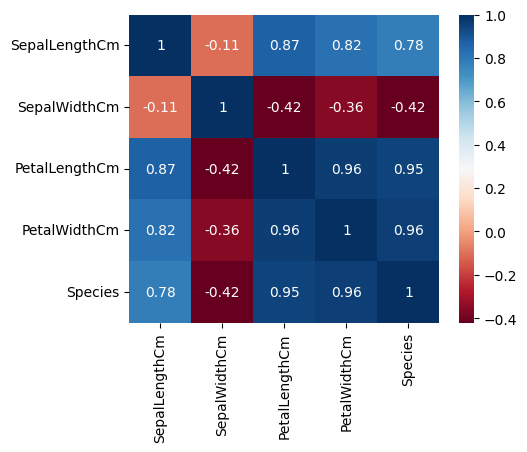

In [9]:
# displaying the correlation matrix using a heatmap
corr=df.corr()
fig, ax=plt.subplots(figsize=(5,4))
sns.heatmap(corr,annot=True,ax=ax,cmap='RdBu') #cmap can be Greens,coolwarm,YlGnBu,RdBu

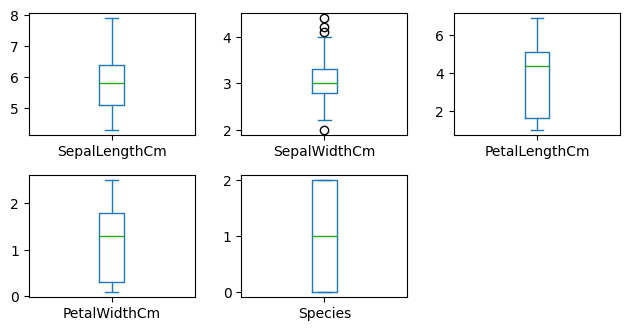

In [10]:
df.plot(kind='box', subplots=True, layout=(3,3), sharex=False, sharey=False)
plt.tight_layout()
plt.show()

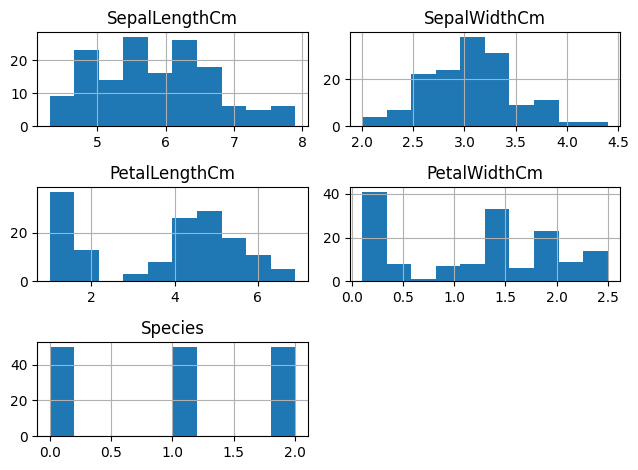

In [11]:
# histograms using pandas plot
df.hist()
plt.tight_layout()
plt.show()

## Pairplot
A Seaborn pair plot visually compares pairs of variables in a dataset, aiding in the quick identification of relationships and data distributions.

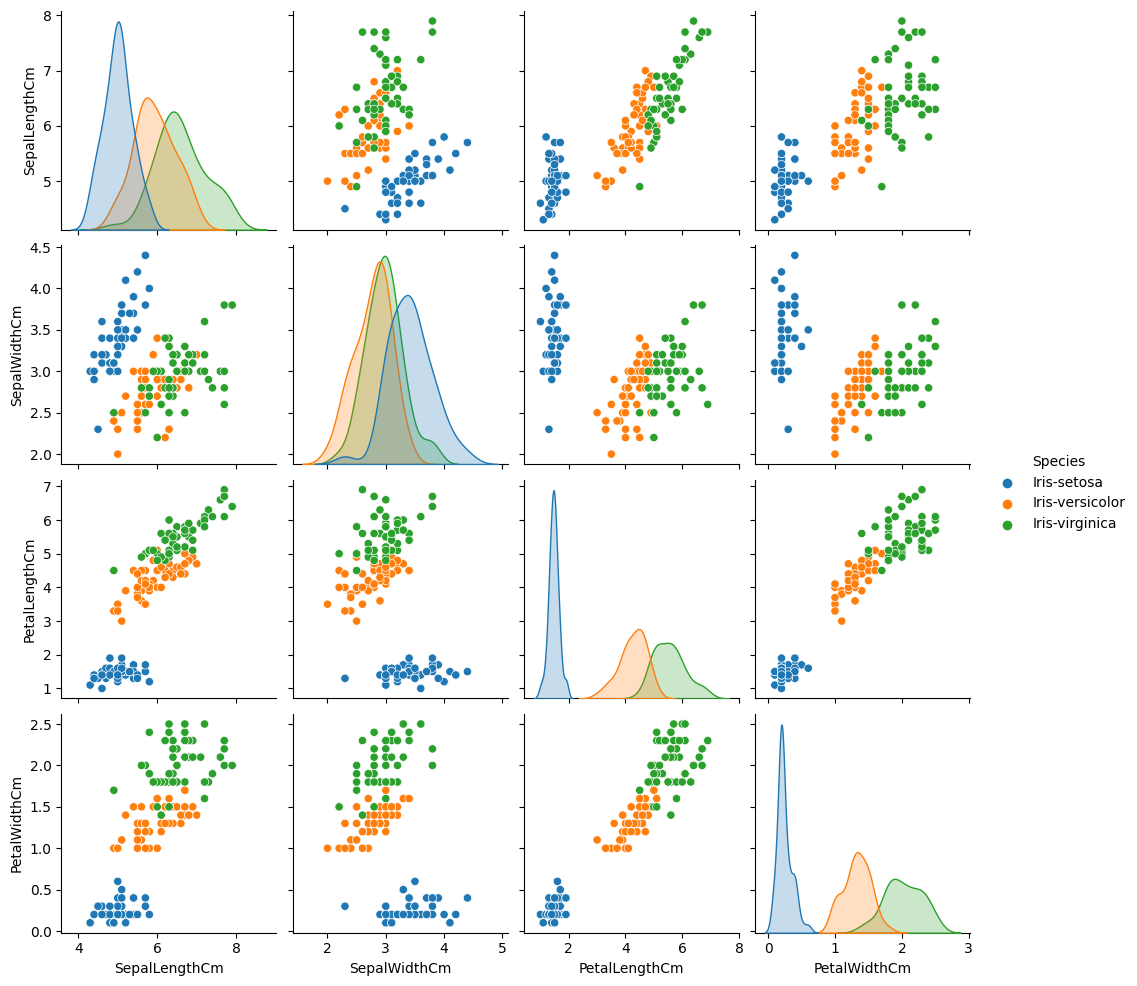

In [12]:
# Pairwise scatter plot: pair plot
sns.pairplot(df_eda,hue="Species")
plt.show()

###  Sepal Length Distribution 

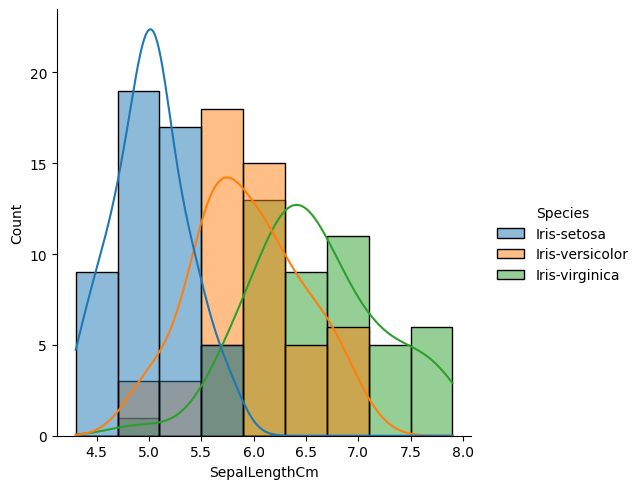

In [13]:
sns.displot(x='SepalLengthCm', data=df_eda, hue='Species', kde=True)
plt.show()

###  Sepal Width Distribution 

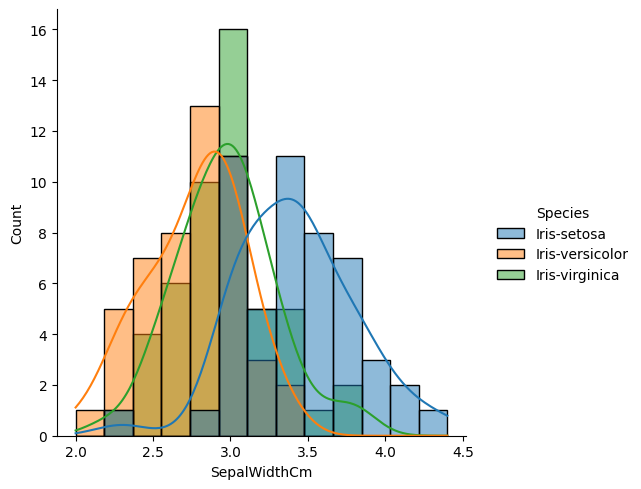

In [14]:
sns.displot(x='SepalWidthCm', data=df_eda, hue='Species', kde=True)
plt.show()

###  Petal Length Distribution 

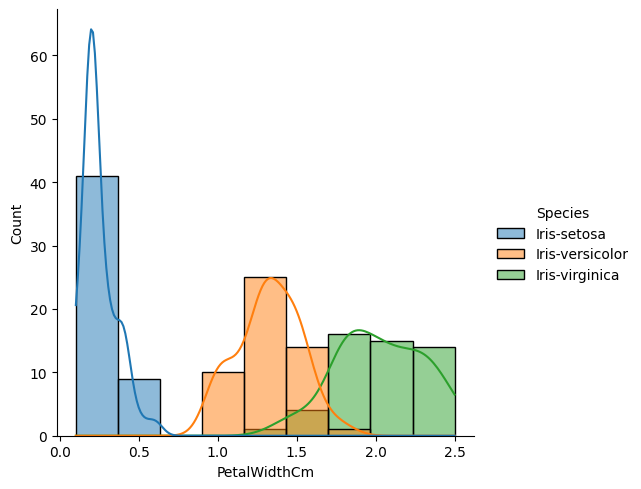

In [15]:
sns.displot(x='PetalWidthCm', data=df_eda, hue='Species', kde=True)
plt.show()

###  Petal Width Distribution 

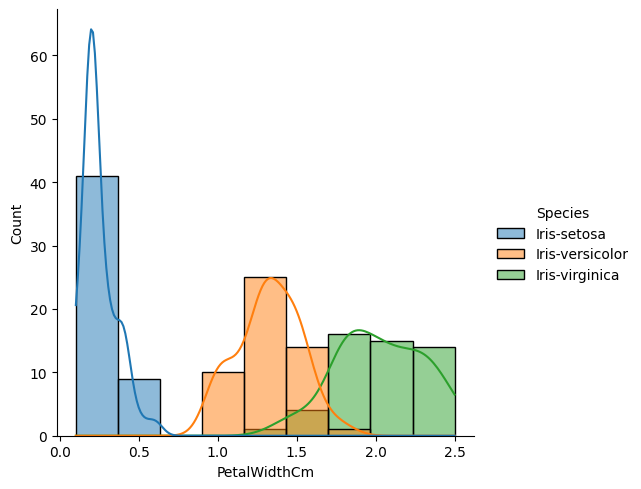

In [16]:
sns.displot(x='PetalWidthCm', data=df_eda, hue='Species', kde=True)
plt.show()

## Splitting the Data:
Divide the dataset into training and testing sets. The training set is used to train the machine learning model, and the testing set is used to evaluate its performance.

**X data**

In [17]:
#Features
X = df.drop('Species', axis=1).to_numpy()
print("\nFeatures before scaling :\n------------------------------------")
print(X[:5,:])

#Create a scaler model that is fit on the input data.
scaler = StandardScaler()
X=scaler.fit_transform(X)
print("\nFeatures after scaling :\n------------------------------------")
print(X[:5,:])


Features before scaling :
------------------------------------
[[5.1 3.5 1.4 0.2]
 [4.9 3.  1.4 0.2]
 [4.7 3.2 1.3 0.2]
 [4.6 3.1 1.5 0.2]
 [5.  3.6 1.4 0.2]]

Features after scaling :
------------------------------------
[[-0.90068117  1.03205722 -1.3412724  -1.31297673]
 [-1.14301691 -0.1249576  -1.3412724  -1.31297673]
 [-1.38535265  0.33784833 -1.39813811 -1.31297673]
 [-1.50652052  0.10644536 -1.2844067  -1.31297673]
 [-1.02184904  1.26346019 -1.3412724  -1.31297673]]


**Y data**

In [18]:
#Labels
Y = df['Species'].to_numpy()
print("\nTarget before scaling :\n------------------------------------")
print(Y[:5])

#Convert target variable as a one-hot-encoding array
Y = tf.keras.utils.to_categorical(Y,3)
print("\nTarget after one-hot-encoding :\n------------------------------------")
print(Y[:5,:])


Target before scaling :
------------------------------------
[0 0 0 0 0]

Target after one-hot-encoding :
------------------------------------
[[1. 0. 0.]
 [1. 0. 0.]
 [1. 0. 0.]
 [1. 0. 0.]
 [1. 0. 0.]]


**Split**

In [19]:
#Spliting data into Train and Test sets
x_train, x_test, y_train, y_test = train_test_split(X, Y, test_size=0.2) #set random_state to get consistent results

print("\nTrain Test Dimensions:\n------------------------------------")
print(x_train.shape, y_train.shape, x_test.shape, y_test.shape)


Train Test Dimensions:
------------------------------------
(120, 4) (120, 3) (30, 4) (30, 3)


## Creating Model

In [20]:
#Number of Labels
NB_CLASSES=3

#Create a sequencial model in Keras
model = tf.keras.models.Sequential()

#Add the first hidden layer
model.add(tf.keras.layers.Dense(128,                    #Number of nodes
                             input_shape=(4,),       #Number of input variables
                              name='Hidden-Layer-1', #Logical name
                              activation='relu'))    #activation function

#Add a second hidden layer
model.add(tf.keras.layers.Dense(90,
                              name='Hidden-Layer-2',
                              activation='relu'))

#Add an output layer with softmax activation
model.add(tf.keras.layers.Dense(NB_CLASSES,
                             name='Output-Layer',
                             activation='softmax'))

#Compile the model with loss & metrics
model.compile(loss='categorical_crossentropy',
              metrics=['accuracy'],
              optimizer=tf.keras.optimizers.Adam(0.001))

#Print the model meta-data
model.summary()


Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 Hidden-Layer-1 (Dense)      (None, 128)               640       
                                                                 
 Hidden-Layer-2 (Dense)      (None, 90)                11610     
                                                                 
 Output-Layer (Dense)        (None, 3)                 273       
                                                                 
Total params: 12523 (48.92 KB)
Trainable params: 12523 (48.92 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [21]:
#Make it verbose so we can see the progress
VERBOSE=1

#Setup Hyper Parameters for training

#Set Batch size
BATCH_SIZE=5
#Set number of epochs
EPOCHS=20
#Set validation split. 20% of the training data will be used for validation
#after each epoch
VALIDATION_SPLIT=0.2

print("\nTraining Progress:\n------------------------------------")

#Fit the model. This will perform the entire training cycle, including
#forward propagation, loss computation, backward propagation and gradient descent.
#Execute for the specified batch sizes and epoch
#Perform validation after each epoch 
history=model.fit(x_train,
          y_train,
          batch_size=BATCH_SIZE,
          epochs=EPOCHS,
          verbose=VERBOSE,
          validation_split=VALIDATION_SPLIT)



Training Progress:
------------------------------------
Epoch 1/20
20/20 [==============================] - 1s 13ms/step - loss: 0.7834 - accuracy: 0.7604 - val_loss: 0.6049 - val_accuracy: 0.8333
Epoch 2/20
20/20 [==============================] - 0s 4ms/step - loss: 0.4698 - accuracy: 0.8438 - val_loss: 0.4445 - val_accuracy: 0.8333
Epoch 3/20
20/20 [==============================] - 0s 4ms/step - loss: 0.3508 - accuracy: 0.8542 - val_loss: 0.3719 - val_accuracy: 0.8750
Epoch 4/20
20/20 [==============================] - 0s 4ms/step - loss: 0.2898 - accuracy: 0.8646 - val_loss: 0.3241 - val_accuracy: 0.8750
Epoch 5/20
20/20 [==============================] - 0s 4ms/step - loss: 0.2488 - accuracy: 0.8750 - val_loss: 0.2796 - val_accuracy: 0.8750
Epoch 6/20
20/20 [==============================] - 0s 4ms/step - loss: 0.2142 - accuracy: 0.9375 - val_loss: 0.2418 - val_accuracy: 0.8750
Epoch 7/20
20/20 [==============================] - 0s 4ms/step - loss: 0.1883 - accuracy: 0.9271 - va


Accuracy during Training :
------------------------------------


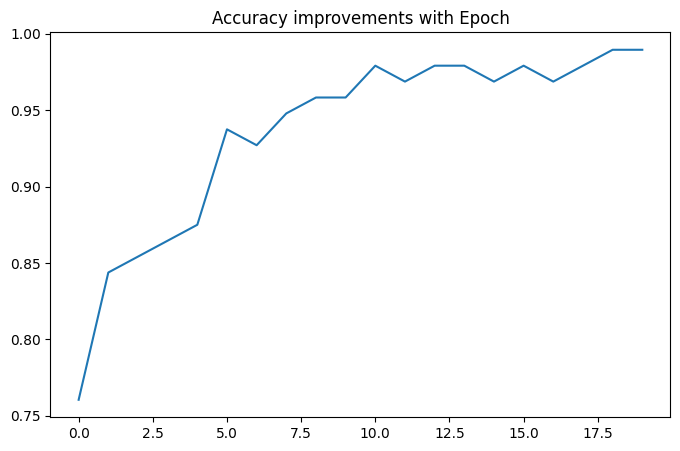

In [22]:
print("\nAccuracy during Training :\n------------------------------------")

#Plot accuracy of the model after each epoch.
pd.DataFrame(history.history)["accuracy"].plot(figsize=(8, 5))
plt.title("Accuracy improvements with Epoch")
plt.show()

In [23]:
#Evaluate the model against the test dataset and print results
print("\nEvaluation against Test Dataset :\n------------------------------------")

# model accuracy
output = model.evaluate(x_test,y_test)
accuracy_dense = output[1]*100.00
print("Accuracy: ",round(accuracy_dense, 2),'%')


Evaluation against Test Dataset :
------------------------------------
1/1 [==============================] - 0s 30ms/step - loss: 0.1717 - accuracy: 0.9333


Accuracy:  93.33 %


## Confusion Matrix

1/1 [==============================] - 0s 79ms/step


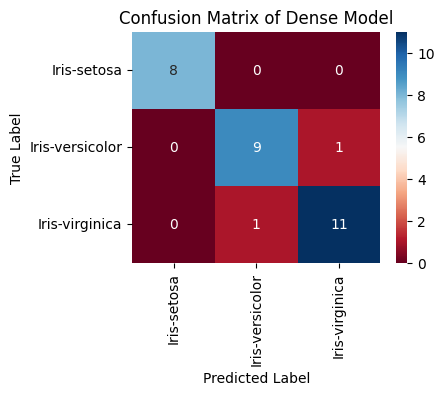

In [24]:
y_pred=model.predict(x_test)

rev_y_test =[np.argmax(y) for y in y_test]
label_encoder.inverse_transform(rev_y_test)

rev_y_pred =[np.argmax(y) for y in y_pred]
label_encoder.inverse_transform(rev_y_pred)

conf_matrix = confusion_matrix(rev_y_test, rev_y_pred)
plt.figure(figsize=(4, 3))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='RdBu',
                xticklabels=np.unique(df_eda['Species']),
                yticklabels=np.unique(df_eda['Species']))
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.title('Confusion Matrix of Dense Model')
plt.show()

In [25]:
#Raw prediction data
prediction_input = [[5.5, 3.0 , 5.0, 1.4]]

#Scale prediction data with the same scaling model
scaled_input = scaler.transform(prediction_input)

#Get raw prediction probabilities
raw_prediction = model.predict(scaled_input)
print("Raw Prediction Output (Probabilities) :" , raw_prediction)

#Find prediction
prediction = np.argmax(raw_prediction)
print("Prediction is ", label_encoder.inverse_transform([prediction]))

1/1 [==============================] - 0s 28ms/step
Raw Prediction Output (Probabilities) : [[0.00289996 0.9021015  0.09499848]]
Prediction is  ['Iris-versicolor']


## Create More Models to Compere

In [26]:
#Labels
rev_y_train =[np.argmax(y) for y in y_train]
label_encoder.inverse_transform(rev_y_train);

### **Model 1**

In [27]:
# Logistic Regression Model
from sklearn.linear_model import LogisticRegression
model1 = LogisticRegression()
model1.fit(x_train, rev_y_train)
accuracy_logreg = model1.score(x_test, rev_y_test) * 100
print("Accuracy (Logistic Regression): ", round(accuracy_logreg, 2),'%')

Accuracy (Logistic Regression):  93.33 %


### **Model 2**

In [28]:
# K-nearest Neighbours Model (KNN)
from sklearn.neighbors import KNeighborsClassifier
model2 = KNeighborsClassifier()
model2.fit(x_train, rev_y_train)
accuracy_knn = model2.score(x_test, rev_y_test) * 100
print("Accuracy (KNN): ", round(accuracy_knn, 2),'%')


Accuracy (KNN):  93.33 %


### **Model 3**

In [29]:
# Decision Tree Model
from sklearn.tree import DecisionTreeClassifier
model3 = DecisionTreeClassifier()
model3.fit(x_train, rev_y_train)
accuracy_decision_tree = model3.score(x_test, rev_y_test) * 100
print("Accuracy (Decision Tree): ", round(accuracy_decision_tree, 2),'%')

Accuracy (Decision Tree):  90.0 %


In [30]:
y_pred1=model1.predict(x_test)
y_pred2=model2.predict(x_test)
y_pred3=model3.predict(x_test)
conf_matrix1 = confusion_matrix(rev_y_test, y_pred1)
conf_matrix2 = confusion_matrix(rev_y_test, y_pred2)
conf_matrix3 = confusion_matrix(rev_y_test, y_pred3)

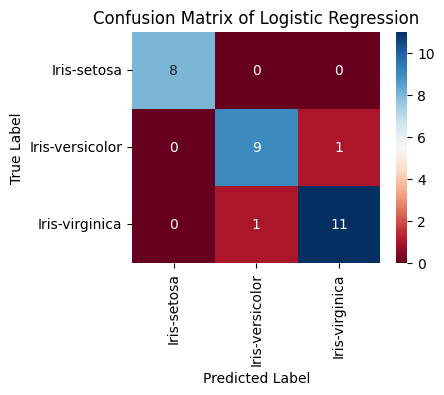

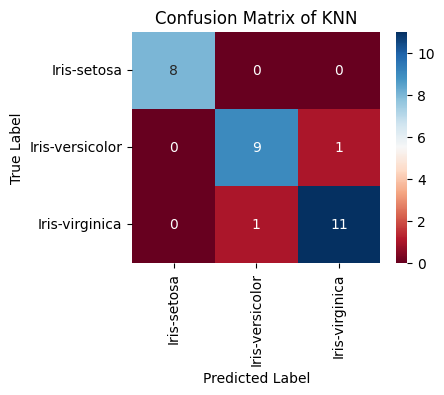

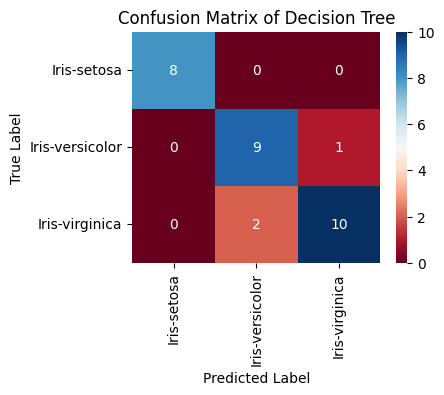

In [31]:
plt.figure(figsize=(4, 3))
sns.heatmap(conf_matrix1, annot=True, fmt='d', cmap='RdBu',
                xticklabels=np.unique(df_eda['Species']),
                yticklabels=np.unique(df_eda['Species']))
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.title('Confusion Matrix of Logistic Regression')

plt.figure(figsize=(4, 3))
sns.heatmap(conf_matrix2, annot=True, fmt='d', cmap='RdBu',
                xticklabels=np.unique(df_eda['Species']),
                yticklabels=np.unique(df_eda['Species']))
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.title('Confusion Matrix of KNN')

plt.figure(figsize=(4, 3))
sns.heatmap(conf_matrix3, annot=True, fmt='d', cmap='RdBu',
                xticklabels=np.unique(df_eda['Species']),
                yticklabels=np.unique(df_eda['Species']))
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.title('Confusion Matrix of Decision Tree')

plt.show()

## **Project Report**

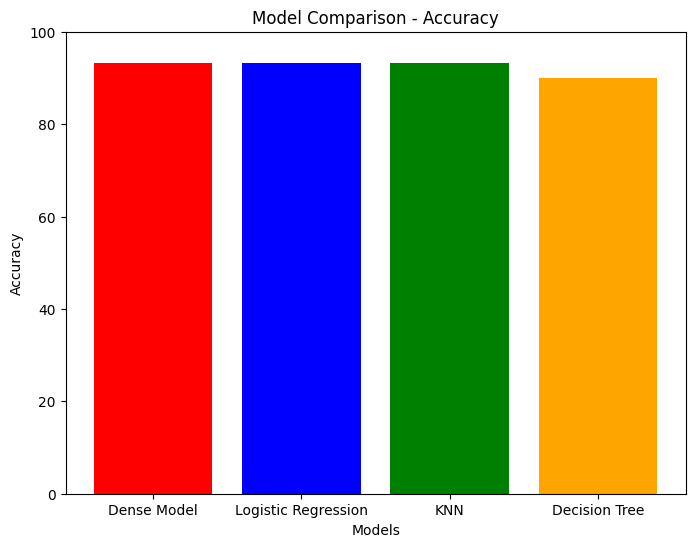

In [32]:
# Model Comparison - Visualization
models = ['Dense Model', 'Logistic Regression', 'KNN', 'Decision Tree']
accuracies = [accuracy_dense, accuracy_logreg, accuracy_knn, accuracy_decision_tree]

plt.figure(figsize=(8, 6))
plt.bar(models, accuracies, color=['red', 'blue', 'green', 'orange'])
plt.xlabel("Models")
plt.ylabel("Accuracy")
plt.title("Model Comparison - Accuracy")
plt.ylim([0, 100])
plt.show()

In [33]:
#Raw prediction data
prediction_input = [[5.5, 3.0 , 5.0, 1.4]]

#Scale prediction data with the same scaling model
scaled_input = scaler.transform(prediction_input)

## Get raw prediction probabilities

In [34]:
raw_prediction = model.predict(scaled_input)
print("Raw Prediction Output (Probabilities) :" , raw_prediction)

#Find prediction
prediction = np.argmax(raw_prediction)
print("Prediction is ", label_encoder.inverse_transform([prediction]))

1/1 [==============================] - 0s 30ms/step
Raw Prediction Output (Probabilities) : [[0.00289996 0.9021015  0.09499848]]
Prediction is  ['Iris-versicolor']


In [35]:
raw_prediction = model1.predict(scaled_input)
print("Raw Prediction Output (Probabilities) :" , raw_prediction)

#Find prediction
print("Prediction is ", label_encoder.inverse_transform(raw_prediction))


Raw Prediction Output (Probabilities) : [1]
Prediction is  ['Iris-versicolor']


In [36]:
raw_prediction = model2.predict(scaled_input)
print("Raw Prediction Output (Probabilities) :" , raw_prediction)

#Find prediction
print("Prediction is ", label_encoder.inverse_transform(raw_prediction))


Raw Prediction Output (Probabilities) : [1]
Prediction is  ['Iris-versicolor']


In [37]:
raw_prediction = model3.predict(scaled_input)
print("Raw Prediction Output (Probabilities) :" , raw_prediction)

#Find prediction
print("Prediction is ", label_encoder.inverse_transform(raw_prediction))

Raw Prediction Output (Probabilities) : [1]
Prediction is  ['Iris-versicolor']


In [38]:
import pickle
# save the model to disk
pickle.dump(model, open('dense_model.pkl', 'wb'))
pickle.dump(model1, open('logistic_regression.pkl', 'wb'))
pickle.dump(model2, open('KNN.pkl', 'wb'))
pickle.dump(model3, open('decision_tree.pkl', 'wb'))